# Machine Learning - Random Forest (SVM)

Using sklearn digits dateset

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

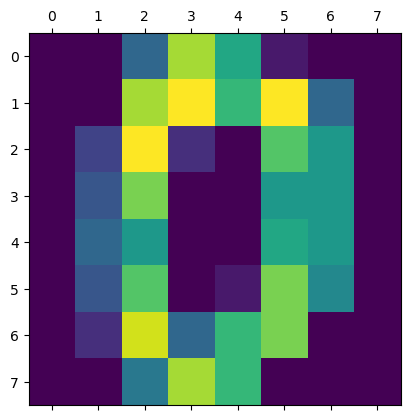

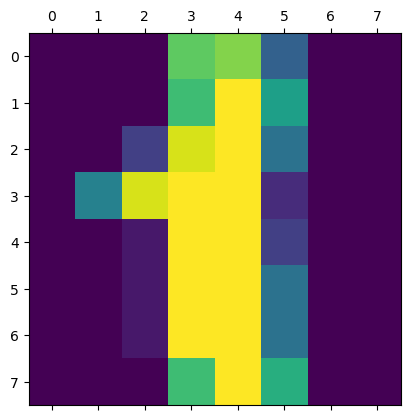

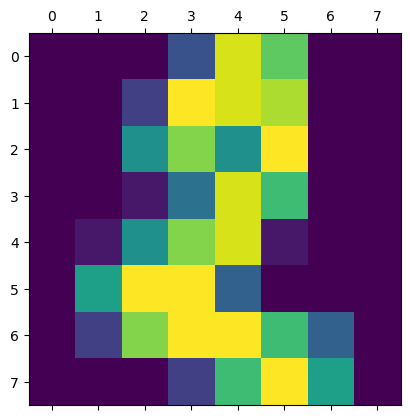

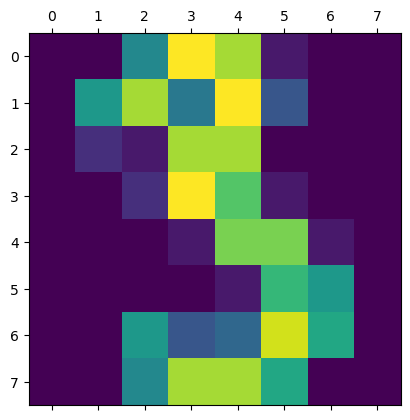

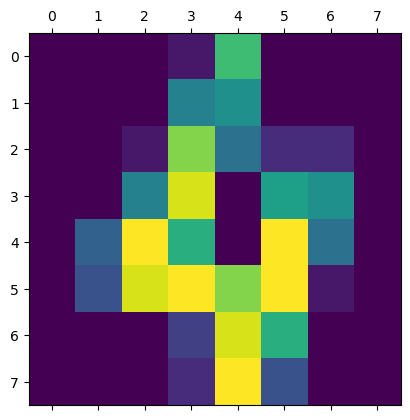

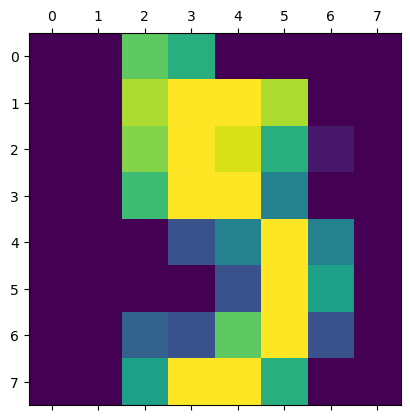

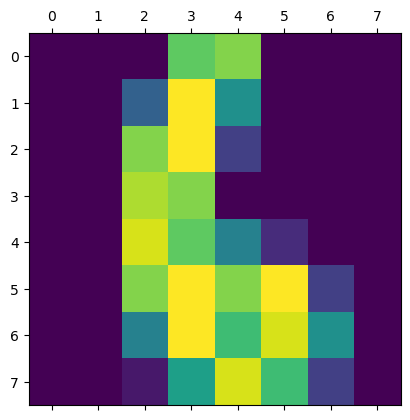

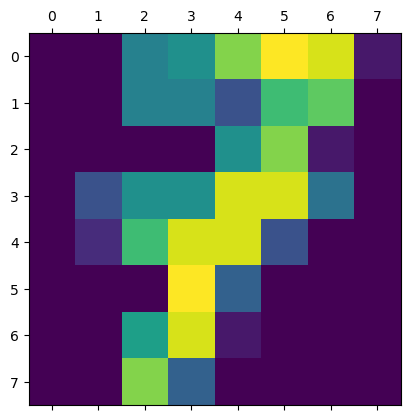

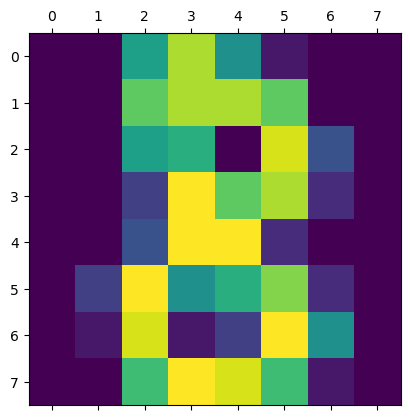

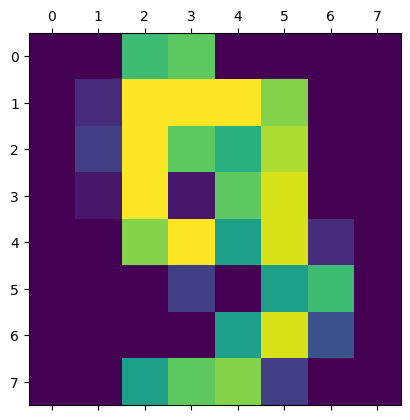

In [9]:
for i in range(10):
    plt.matshow(digits.images[i])


In [12]:
#creating a dataframe from the dataset.
df = pd.DataFrame(digits.data)

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [14]:
# Adding the target variable.
df["target"] = digits.target

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [16]:
#splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis="columns"), df.target, test_size=0.2)

In [20]:
X_test.shape

(360, 64)

In [19]:
y_test.shape

(360,)

In [69]:
#creating the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=60)

In [70]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60)

In [71]:
rf.score(X_test, y_test)

0.9722222222222222

In [73]:
#getting the y_predicted and comparing it with the confusion metrics

y_prediction = rf.predict(X_test)

#plotting the confusion metrics to know how the model perform
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  1, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

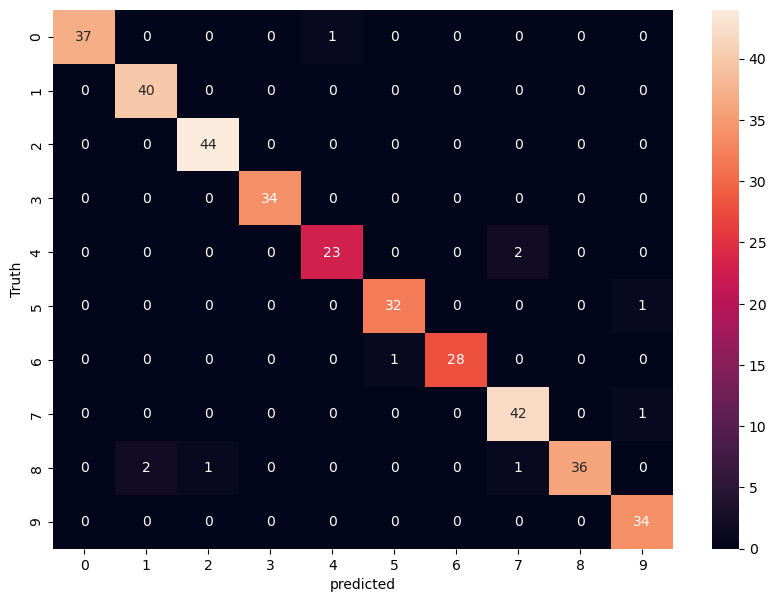

In [76]:
#plotting using seavborn to visualize it
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

Exercise

Use famous Iris flower datasets from sklearn.datasets to predict flower species using random forest classifier.

1. Measure prediction score using default n_estimators(10)
2. Now fine tune your model by changing number of trees in your classifier and tell me what best score you can get using how many trees.


In [77]:
from sklearn.datasets import load_iris

iris = load_iris()

In [84]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df

#splitting the datasets into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis="columns"), df.target, test_size=0.2)

#creating the Randomforest classifier.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In conclusion fine tuning the model more that 100 trees will reduce the accuracy from <b>96.6666666666667</b> to a lesser value

In [86]:
#plotting the confusion metrics to know the truth and the predicted values
y_predict = model.predict(X_test)


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

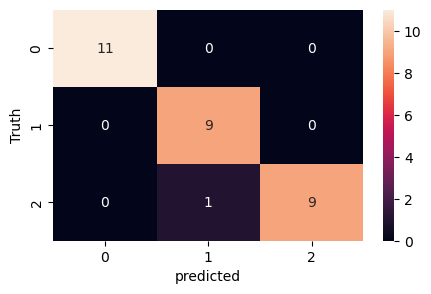

In [90]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")